# Describtive analysis

#### Load namespaces

In [2]:
import pandas as pd
from models.helpers_talent import *
import pingouin as pg
from scipy.stats import ttest_ind

#### Load Data

In [3]:
group = 1                   # age class 'AK'
test_size = 0.2             # train-test split
dat, X_0, y_0, _, _, _, _ = load_data(group=group,
                                      test_size=test_size,
                                      sub=True) # subjectives = True
dat = dat[['TZP', 'Geburtstag_Taggenau', 'Grösse', 'Gewicht', 'SL20', 'GW',
           'DR', 'BK', 'BJ', 'SKSC_TAK', 'SKSC_TEC', 'SKSC_KON', 'SKSC_PSY',
           'Subj_Aktuelle_Leistungsfähigkeit', 'Subj_Zukünftiges_Leistungsniveau',
           'LZ']]
succ =  dat[dat['LZ']==1]
fail = dat[dat['LZ']==0]

## Description of the variables in the complete data

In [19]:
print('The data contains {0} players and {1} variables. {2} of which were successful'.format(dat.shape[0], dat.shape[1], dat[dat['LZ']==1].shape[0]))


The data contains 6523 players and 16 variables. 570 of which were successful


In [20]:
dat[['Geburtstag_Taggenau', 'Grösse', 'Gewicht']].describe().iloc[[1,2,3,7], :]

,Geburtstag_Taggenau,Grösse,Gewicht
mean,159.843170,150.576728,38.953351
std,102.218194,6.778874,5.617634
min,1.000000,120.000000,23.500000
max,366.000000,178.000000,130.000000


In [21]:
dat[['SL20', 'GW', 'DR', 'BK', 'BJ']].describe().iloc[[1,2,3,7], :]

,SL20,GW,DR,BK,BJ
mean,3.635030,8.363350,11.032916,10.221507,2.633911
std,0.159414,0.398221,0.749508,1.336135,3.170843
min,3.000000,6.830000,8.610000,6.770000,0.000000
max,4.270000,10.000000,16.000000,18.830000,36.000000


In [22]:
dat[['SKSC_TAK', 'SKSC_TEC', 'SKSC_KON', 'SKSC_PSY']].describe().iloc[[1,2,3,7], :]

,SKSC_TAK,SKSC_TEC,SKSC_KON,SKSC_PSY
mean,1.495740,1.362308,1.731565,1.741223
std,0.597289,0.565992,0.750035,0.669124
min,0.000000,0.000000,0.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000


In [29]:
dat[['Subj_Aktuelle_Leistungsfähigkeit', 'Subj_Zukünftiges_Leistungsniveau']].describe().iloc[[1,2,3,7], :]

,mean,std,min,max
Subj_Aktuelle_Leistungsfähigkeit,1.514947,0.713829,0.0,3.0
Subj_Zukünftiges_Leistungsniveau,2.398130,0.631273,1.0,3.0


## Hypotheses tests
We check in a multivariate test and in individual t-test the mean differences of successful and non-successful players.

### Multivariate t-test (Hotelling's T^2)

In [27]:
pg.multivariate_ttest(succ,fail)

,T2,F,df1,df2,pval
hotelling,837.703294,52.236022,16,6506,3.532817e-157


### Individual t-tests



In [112]:
stat, p = ttest_ind(succ.iloc[:, 1],fail.iloc[:, 1])
test_result = np.transpose(succ.iloc[:, 1:2].describe().iloc[[1,2], :])
temp_0 = np.transpose(fail.iloc[:, 1:2].describe().iloc[[1,2], :])
test_result[['mean_0', 'std_0']] = temp_0
test_result["t-statistic"] = stat
test_result["p-value"] = p
for i in range(2, dat.iloc[:, 1:-2].shape[1]):
    stat, p = ttest_ind(succ[dat.columns[i]],fail[dat.columns[i]])
    temp = np.transpose(succ.iloc[:, i:(i+1)].describe().iloc[[1,2], :])
    temp_0 = np.transpose(fail.iloc[:, i:(i+1)].describe().iloc[[1,2], :])
    temp[['mean_0', 'std_0']] = temp_0
    temp["t-statistic"] = stat
    temp["p-value"] = p
    test_result = test_result.append(temp)
    #print('For ', name, 'the test statistic is %.3f and p=%.3f' % (stat, p))
test_result

,mean,std,mean_0,std_0,t-statistic,p-value
Geburtstag_Taggenau,133.212281,97.090353,162.393079,102.340594,-6.531808,6.988097e-11
Grösse,154.164912,7.310404,150.233160,6.625246,13.408583,1.843506e-40
Gewicht,41.777368,6.005574,38.682951,5.504106,12.717261,1.287320e-36
SL20,3.543456,0.151146,3.643798,0.157425,-14.587356,1.878577e-47
GW,8.230298,0.417453,8.376089,0.394017,-8.394387,5.687930e-17
DR,10.695088,0.695057,11.065263,0.746593,-11.374847,1.061674e-29
BK,9.740877,1.252403,10.267527,1.334929,-9.045401,1.935343e-19
BJ,4.114035,4.221376,2.492189,3.013909,11.788606,9.371616e-32
SKSC_TAK,1.897494,0.570911,1.457272,0.585511,17.185127,9.014031e-65
SKSC_TEC,1.708772,0.527121,1.329134,0.558450,15.579139,9.310289e-54


In [35]:
descr = dat.iloc[:,1:13]
descr.columns =['relative age', 'height', 'weight', 'sprint (20m)', 'agility','dribbling','ball control','juggling','tactical skills','kicking skills','endurance','psychological skills']
print(round(descr.describe().iloc[1:3,:].transpose(),2).to_latex())

\begin{tabular}{lrr}
\toprule
{} &    mean &     std \\
\midrule
relative age         &  159.81 &  102.20 \\
height               &  150.58 &    6.78 \\
weight               &   38.94 &    5.50 \\
sprint (20m)         &    3.64 &    0.16 \\
agility              &    8.36 &    0.40 \\
dribbling            &   11.03 &    0.75 \\
ball control         &   10.22 &    1.34 \\
juggling             &    2.63 &    3.17 \\
tactical skills      &    1.50 &    0.60 \\
kicking skills       &    1.36 &    0.57 \\
endurance            &    1.73 &    0.75 \\
psychological skills &    1.74 &    0.67 \\
\bottomrule
\end{tabular}



## Plot

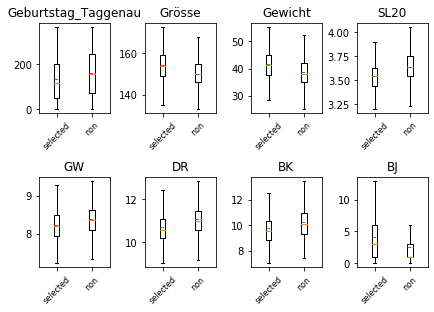

In [115]:
fig, axs = plt.subplots(2, 4)
bool_means = True
axs[0,0].boxplot([succ['Geburtstag_Taggenau'],fail['Geburtstag_Taggenau']],0,'',showmeans=bool_means, meanline=True)
axs[0,0].set_title('Geburtstag_Taggenau')
axs[0,0].set_xticklabels(['selected','non'],rotation=45, fontsize=8)

axs[0,1].boxplot([succ['Grösse'],fail['Grösse']],0,'',showmeans=bool_means, meanline=True)
axs[0,1].set_title('Grösse')
axs[0,1].set_xticklabels(['selected','non'],rotation=45, fontsize=8)

axs[0,2].boxplot([succ['Gewicht'],fail['Gewicht']],0,'',showmeans=bool_means, meanline=True)
axs[0,2].set_title('Gewicht')
axs[0,2].set_xticklabels(['selected','non'],rotation=45, fontsize=8)

axs[0,3].boxplot([succ['SL20'],fail['SL20']],0,'',showmeans=bool_means, meanline=True)
axs[0,3].set_title('SL20')
axs[0,3].set_xticklabels(['selected','non'],rotation=45, fontsize=8)

axs[1,0].boxplot([succ['GW'],fail['GW']],0,'',showmeans=bool_means, meanline=True)
axs[1,0].set_title('GW')
axs[1,0].set_xticklabels(['selected','non'],rotation=45, fontsize=8)

axs[1,1].boxplot([succ['DR'],fail['DR']],0,'',showmeans=bool_means, meanline=True)
axs[1,1].set_title('DR')
axs[1,1].set_xticklabels(['selected','non'],rotation=45, fontsize=8)

axs[1,2].boxplot([succ['BK'],fail['BK']],0,'',showmeans=bool_means, meanline=True)
axs[1,2].set_title('BK')
axs[1,2].set_xticklabels(['selected','non'],rotation=45, fontsize=8)

axs[1,3].boxplot([succ['BJ'],fail['BJ']],0,'',showmeans=bool_means, meanline=True)
axs[1,3].set_title('BJ')
axs[1,3].set_xticklabels(['selected','non'],rotation=45, fontsize=8)

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.7, wspace=0.5)


